In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
# The Digits MNIST data is available directly in the tf.keras datasets API

fashion_mnist = tf.keras.datasets.fashion_mnist

In [0]:
# load_data will give you two sets of two lists, 
# training and testing values that contain the clothing items and their labels.

(training_images, training_labels) ,  (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# print shape and data type

print(training_images.shape, training_images.dtype)
print(training_labels.shape, training_labels.dtype)
print(test_images.shape, test_images.dtype)
print(test_labels.shape, test_labels.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [0]:
# labels

print(training_labels[:10])
print(test_labels[:10])

[9 0 0 3 0 2 7 2 5 5]
[9 2 1 1 6 1 4 6 5 7]


9
Ankle boot


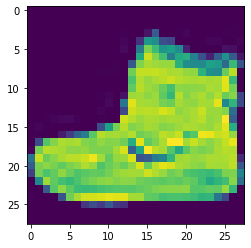

In [0]:
# plot images

plt.imshow(training_images[0])
print(training_labels[0])
print(class_names[training_labels[0]])

In [0]:
# For various reasons it's easier if we treat all values as between 0 and 1
# a process called 'normalizing'

training_images = training_images/255.0
test_images = test_images/255.

print(training_images.shape, training_images.dtype)
print(test_images.shape, test_images.dtype)

(60000, 28, 28) float64
(10000, 28, 28) float64


In [0]:
# Reshape before passing to the convolutional layer

training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

print(training_images.shape, training_images.dtype)
print(test_images.shape, test_images.dtype)

(60000, 28, 28, 1) float64
(10000, 28, 28, 1) float64


In [0]:
# Sequential: That defines a sequence of layers in the neural network
# Flatten: Flatten just takes multidiamentional array and turns it into a 1D array
# Dense: Adds a layer of neurons

# Activation function: Each layer of neurons need it, to tell them what to do. There's lots of options.
#   Relu means "If X>0 return X, else return 0"
#     so it only passes values 0 or greater to the next layer.
#   Softmax takes a set of values, and effectively picks the biggest one, 
#     if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], 
#     it turns it into [0,0,0,0,1,0,0,0,0]

# Convolution: Takes an filter/array (usually 3x3 or 5x5) and pass it over the image. 
#   By changing the underlying pixels based on the formula within that matrix, 
#   you can do things like edge detection

# First layer takes 28*28 single channel images, 
#   and apply 64 filters of size 3*3, 
#   and apply relu activation function

# Second layer pass 2*2 max pooling layer over the image,
#  and giving a reduced image

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Loss function —This measures how accurate the model is during training. 
#   You want to minimize this function to "steer" the model in the right direction.
# Optimizer —This is how the model is updated 
#    based on the data it sees and its loss function.
# Metrics —Used to monitor the training and testing steps. 
#   The following example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

In [0]:
# # cancelling training before the completeion of given epoch on reaching below desired loss level

# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('loss')<0.375):
#       print("\nCancelling training!")
#       self.model.stop_training = True

# callbacks = myCallback()

In [0]:
history = model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 312us/sample - loss: 0.5865 - acc: 0.7844
Epoch 2/5
60000/60000 [==============================] - 15s 251us/sample - loss: 0.3989 - acc: 0.8517
Epoch 3/5
60000/60000 [==============================] - 15s 248us/sample - loss: 0.3477 - acc: 0.8712
Epoch 4/5
60000/60000 [==============================] - 15s 247us/sample - loss: 0.3145 - acc: 0.8828
Epoch 5/5
60000/60000 [==============================] - 15s 248us/sample - loss: 0.2872 - acc: 0.8933


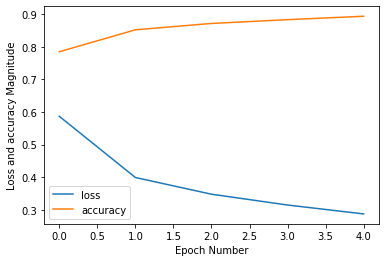

In [0]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss and accuracy Magnitude")
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['acc'], label='accuracy')
plt.legend()
plt.show()

In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 131us/sample - loss: 0.3459 - acc: 0.8740


[0.34585714905261994, 0.874]

In [0]:
classifications = model.predict(test_images)

[2.6473453e-02 4.1244805e-04 5.8817148e-02 8.4251650e-03 9.0847529e-02
 9.4399660e-08 8.1495160e-01 4.3459121e-08 7.2522424e-05 3.0772959e-08]


TypeError: ignored

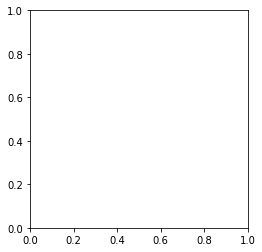

In [0]:
print(classifications[4])
plt.imshow(test_images[4])
print(test_labels[4])
print(class_names[test_labels[4]])